In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading Datasets From Kaggle

In [ ]:
! pip install kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download  quora/question-pairs-dataset

 91% 19.0M/20.8M [00:02<00:00, 11.2MB/s]
100% 20.8M/20.8M [00:02<00:00, 9.04MB/s]


In [ ]:
! unzip question-pairs-dataset.zip

Archive:  question-pairs-dataset.zip
  inflating: questions.csv           


In [ ]:
import pandas as pd
df = pd.read_csv('/content/questions.csv')

In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 404351
Number of columns: 6


In [ ]:
null_values = df.isnull().sum()
print("\nNull values per column:")
print(null_values)



Null values per column:
id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
null_values = df.isnull().sum()
print("\nNull values per column:")
print(null_values)


Null values per column:
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


In [ ]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# Visualizing and deleting duplicate rows

In [ ]:
def display_duplicate_rows(df):

    duplicate_mask = df.duplicated(subset=['qid1', 'qid2'],keep='first')
    duplicate_df = df[duplicate_mask]
    return duplicate_df

def dropp_duplicates(df):
    df=df.drop_duplicates(subset=['qid1', 'qid2'],keep='first')
    return df

In [ ]:
duplicate_rows_df = display_duplicate_rows(df)

In [ ]:
duplicate_rows_df

,id,qid1,qid2,question1,question2,is_duplicate
297202,297202,401038,401039,"I have not been running for last 10 days, and ...","I have not been running for last 10 days, and ...",1
336568,336568,470424,470425,When was 2011 5th Global Shipping Summit?,Where is the 2011 5th Global Shipping Summit?,0
403565,403565,410323,410324,Which biology areas have the most low-hanging ...,Which astronomy areas have the most low-hangin...,0


In [ ]:
df=dropp_duplicates(df)

In [ ]:
duplicate_rows_df = display_duplicate_rows(df)
duplicate_rows_df

,id,qid1,qid2,question1,question2,is_duplicate


# Downloading all-MiniLM-L6-v2 to calculate word embedding and cosine similarity

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=d2c035345cf74e5893dcb73a5aa5f14f3533ec110d81576079b5ad36c46e6230
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('/content/drive/MyDrive/Sentence_Similarity_Transformer')

In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import numpy as np
def preprocess_and_embed(question):

    return model.encode(question)

def calculate_cosine_similarity(embedding1, embedding2):

    cos_sim = util.cos_sim(embedding1, embedding2)
    return cos_sim.item()




In [ ]:
df['embed_q1'] = df['question1'].apply(preprocess_and_embed)
df['embed_q2'] = df['question2'].apply(preprocess_and_embed)

In [ ]:
null_values = df.isnull().sum()
print("\nNull values per column:")
print(null_values)


Null values per column:
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
embed_q1        0
embed_q2        0
dtype: int64


In [ ]:
#As duplicates have been dropped
df.reset_index(inplace=True)

In [ ]:

df['score'] = [calculate_cosine_similarity(df['embed_q1'][i], df['embed_q2'][i]) for i in range(len(df))]

In [ ]:
df.drop(['embed_q1', 'embed_q2'], axis=1, inplace=True)


In [ ]:
import re
from bs4 import BeautifulSoup


# Text preprocessing to remove HTML tags,Punctuations and White spaces

In [ ]:
def preprocess(q):

    q = str(q).lower().strip()


    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')




    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)


    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Remove HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    # Remove extra white spaces
    q = ' '.join(q.split())


    return q

In [ ]:
preprocess("how........are you?")

'how are you'

# Generating Numerical features from the text

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/output_file.csv')

In [ ]:
data['question1'] = data['question1'].apply(preprocess)
data['question2'] = data['question2'].apply(preprocess)

In [ ]:
data['q1_len'] = data['question1'].str.len()
data['q2_len'] = data['question2'].str.len()

In [ ]:
data['q1_num_words'] = data['question1'].apply(lambda row: len(row.split(" ")))
data['q2_num_words'] = data['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)
data['word_common'] = data.apply(common_words, axis=1)

In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))
data['word_total'] = data.apply(total_words, axis=1)


In [ ]:
data['word_share'] = round(data['word_common']/data['word_total'],2)

In [ ]:
data.head(3)

,index,id,qid1,qid2,question1,question2,is_duplicate,score,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.912277,65,56,14,12,11,23,0.48
1,1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,0.655141,48,85,10,15,7,24,0.29
2,2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.515561,72,58,14,10,4,24,0.17


In [ ]:
correlation = data['word_share'].corr(data['score'])
print("Correlation between 'word_share' and 'score':", correlation)


Correlation between 'word_share' and 'score': 0.7198084757639337


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
token_features = data.apply(fetch_token_features, axis=1)

data["cwc_min"]       = list(map(lambda x: x[0], token_features))
data["cwc_max"]       = list(map(lambda x: x[1], token_features))
data["csc_min"]       = list(map(lambda x: x[2], token_features))
data["csc_max"]       = list(map(lambda x: x[3], token_features))
data["ctc_min"]       = list(map(lambda x: x[4], token_features))
data["ctc_max"]       = list(map(lambda x: x[5], token_features))
data["last_word_eq"]  = list(map(lambda x: x[6], token_features))
data["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
token_features

0         [0.999980000399992, 0.8333194446759221, 0.9999...
1         [0.7999840003199936, 0.39999600003999963, 0.74...
2         [0.3999920001599968, 0.3333277778703688, 0.399...
3                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0]
4         [0.3999920001599968, 0.19999800001999982, 0.99...
                                ...                        
404340    [0.8571306124198226, 0.8571306124198226, 0.999...
404341    [0.6666444451851604, 0.6666444451851604, 0.599...
404342    [0.9999000099990001, 0.49997500124993743, 0.99...
404343    [0.0, 0.0, 0.124998437519531, 0.09999900000999...
404344    [0.9999666677777407, 0.9999666677777407, 0.999...
Length: 404345, dtype: object

In [ ]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=4bf89a07aeaea9def2d2a50db2e1240ee560111169ec25928064f4f8bee40378
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    print(q1_tokens)
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0


    return length_features


In [ ]:
length_features = data.apply(fetch_length_features, axis=1)

data['abs_len_diff'] = list(map(lambda x: x[0], length_features))
data['mean_len'] = list(map(lambda x: x[1], length_features))
data['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

Streaming output truncated to the last 5000 lines.
['what', 'universities', 'does', 'lakeland', 'financial', 'recruit', 'new', 'grads', 'from', 'what', 'majors', 'are', 'they', 'looking', 'for']
['why', 'india', 'does', 'not', 'have', 'an', 'open', 'border', 'with', 'bangladesh', 'like', 'nepal', 'or', 'bhutan']
['what', 'is', 'the', 'difference', 'between', 'school', 'life', 'and', 'college', 'life']
['i', 'forgot', 'my', 'gmail', 'username', 'and', 'have', 'no', 'access', 'to', 'my', 'recovery', 'phone', 'number', 'how', 'can', 'i', 're', 'access', 'my', 'gmail', 'account']
['what', 'is', 'the', 'average', 'sale', 'dollars', 'what', 'is', 'the', 'average', 'number', 'of', 'sales', 'in', 'a', 'fast', 'casual', 'restaurant', 'in', 'california', 'per', 'day', 'week', 'month', 'etc']
['how', 'do', 'you', 'fall', 'asleep', 'fast', 'when', 'you', 'are', 'not', 'tired']
['how', 'can', 'i', 'start', 'in', 'information', 'security']
['how', 'do', 'you', 'watch', 'netflix', 'on', 'a', 'laptop'

In [ ]:
length_features

0           [2, 13.0, 0.9824561403508771]
1           [5, 12.5, 0.5714285714285714]
2           [4, 12.0, 0.1694915254237288]
3          [2, 12.0, 0.04081632653061224]
4          [6, 10.0, 0.15384615384615385]
                       ...               
404340      [1, 13.5, 0.3924050632911392]
404341       [1, 8.5, 0.6341463414634146]
404342      [0, 4.0, 0.47058823529411764]
404343    [8, 21.0, 0.053763440860215055]
404344       [2, 9.0, 0.6216216216216216]
Length: 404345, dtype: object

In [ ]:
data.columns

Index(['index', 'id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'score', 'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words',
       'word_common', 'word_total', 'word_share', 'cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substr_ratio'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


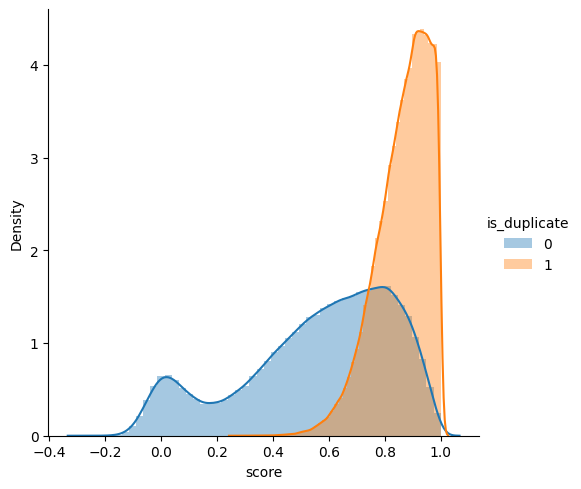

In [ ]:
import seaborn as sns

sns.FacetGrid(data, hue="is_duplicate", height=5).map(sns.distplot, 'score').add_legend()
plt.show()


In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
fuzzy_features = data.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
data['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
data['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
data['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
data['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
output_file_path = '/content/drive/MyDrive/output_file.csv'
data.to_csv(output_file_path, index=False)

In [ ]:
data.columns

Index(['index', 'id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'score', 'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words',
       'word_common', 'word_total', 'word_share', 'cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substr_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'token_set_ratio'],
      dtype='object')

# Visualizing Numerical Features Using Box Plots. Retained features for which there is a noticeable differentiation between values of 0 and 1.

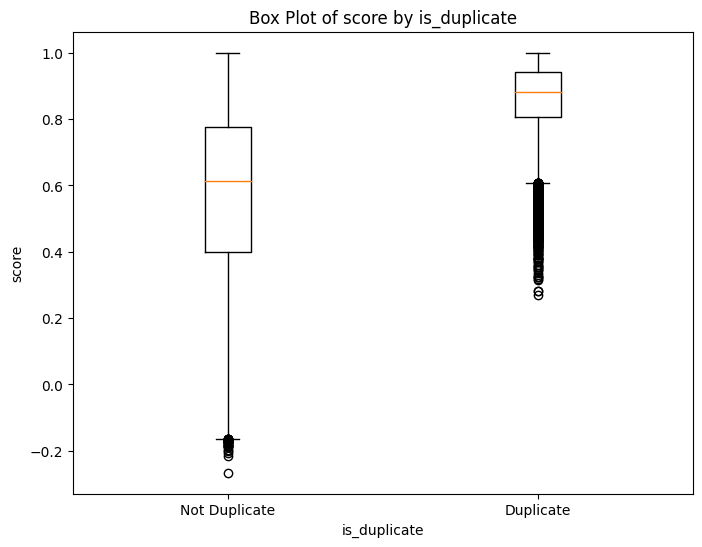

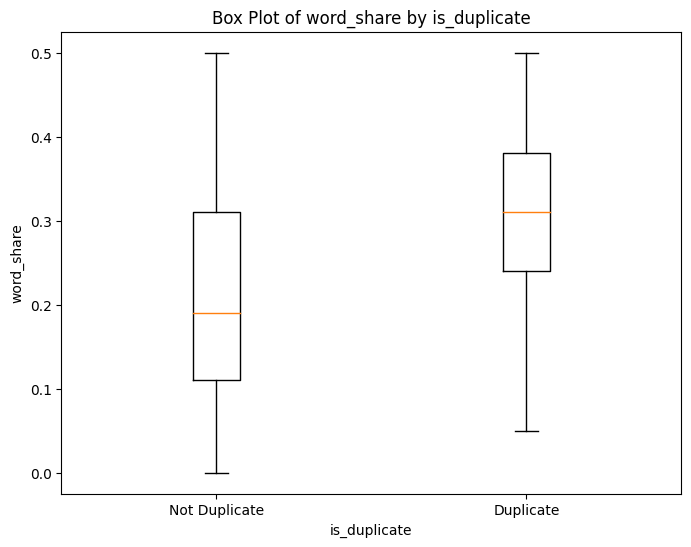

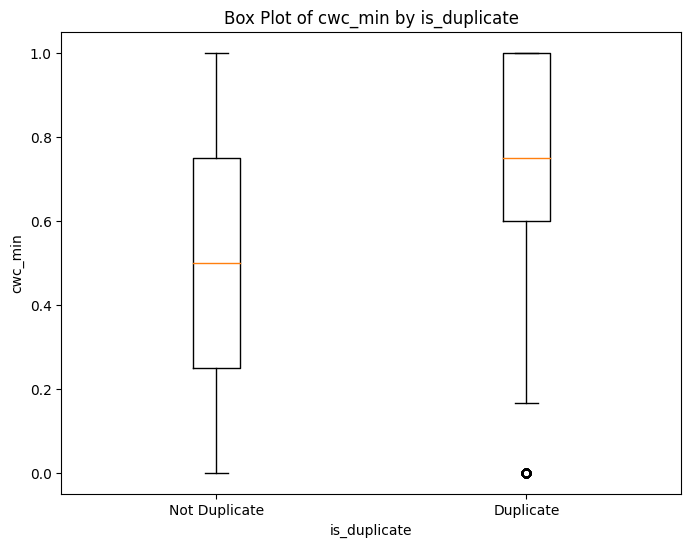

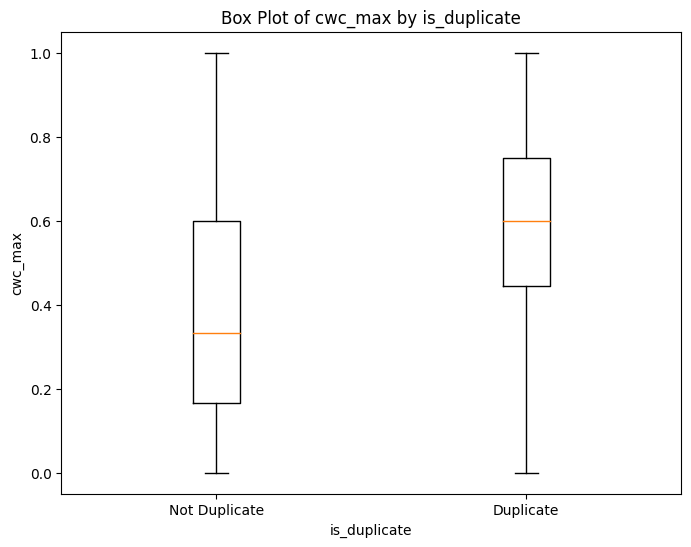

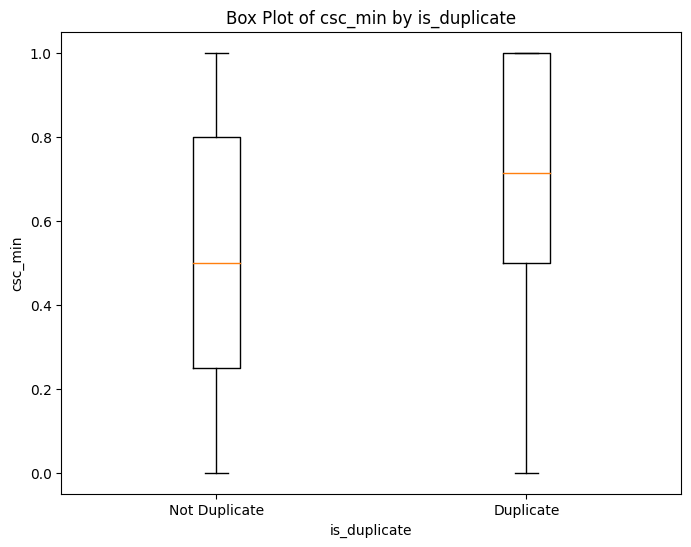

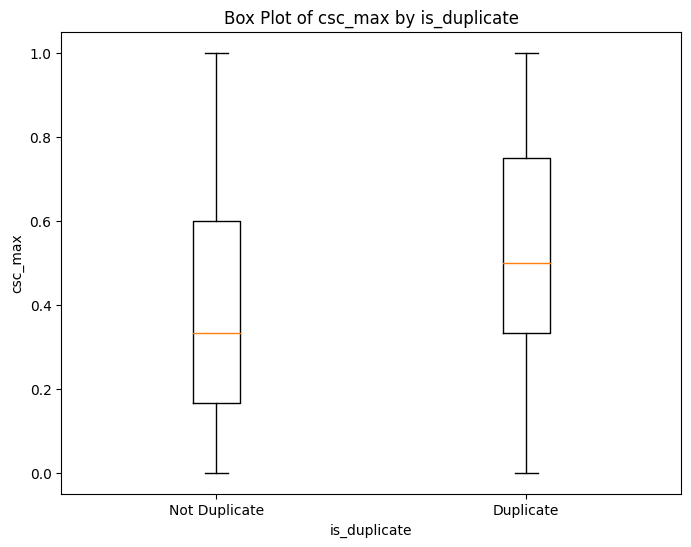

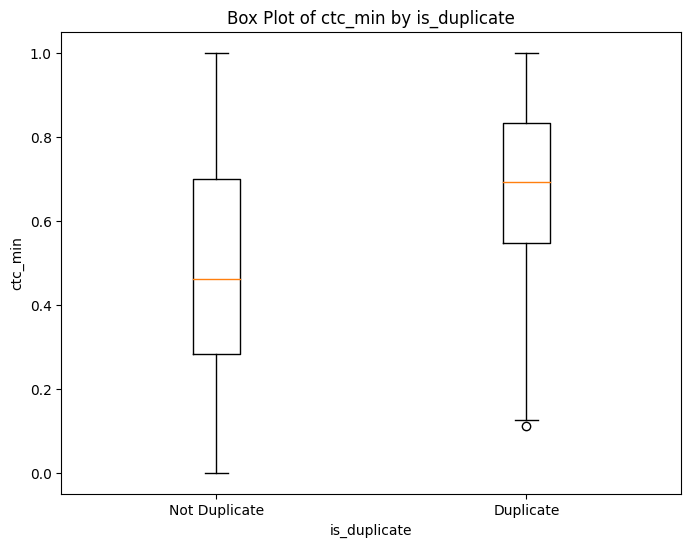

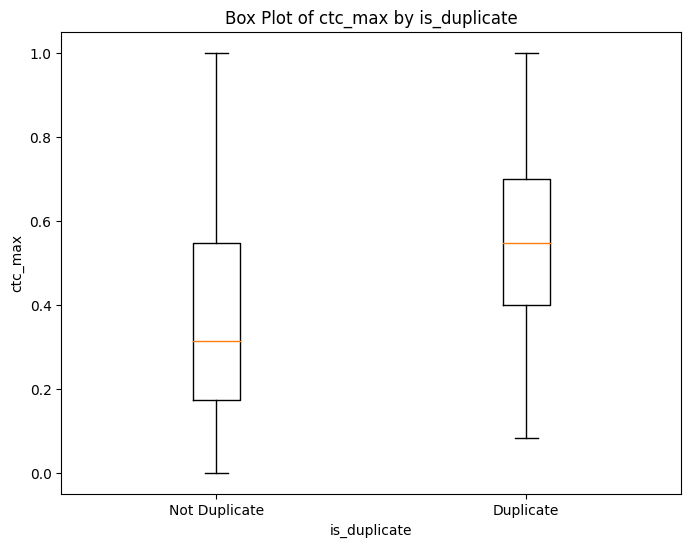

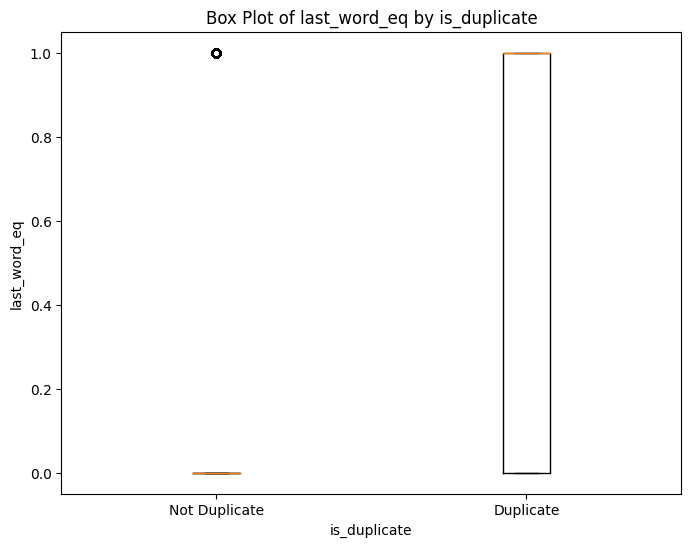

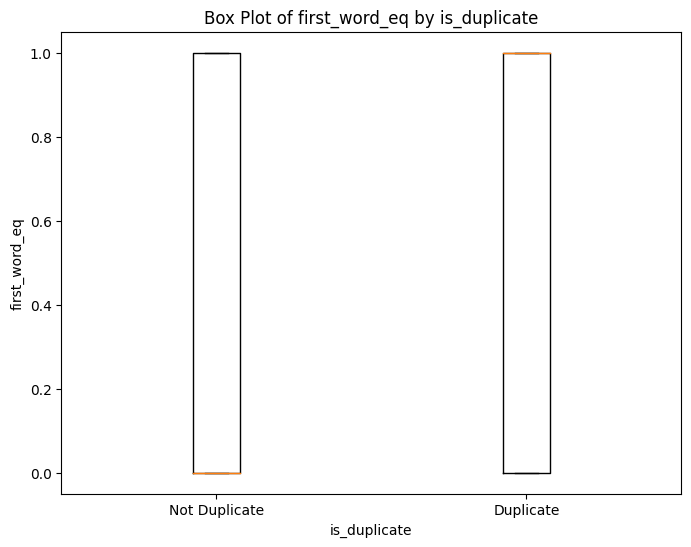

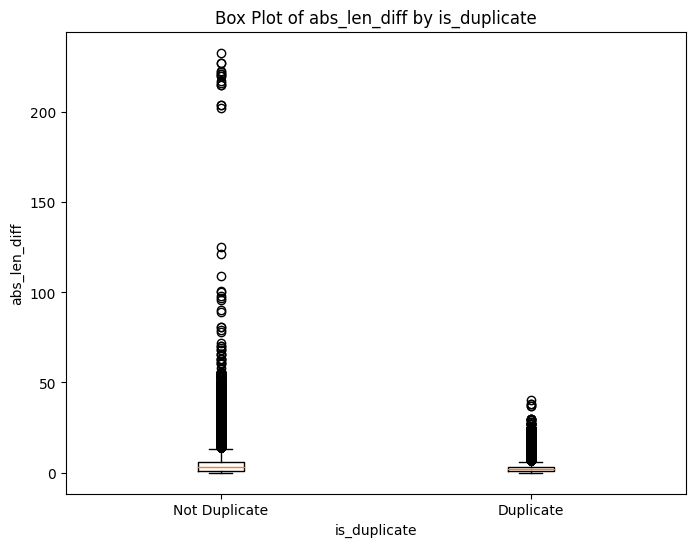

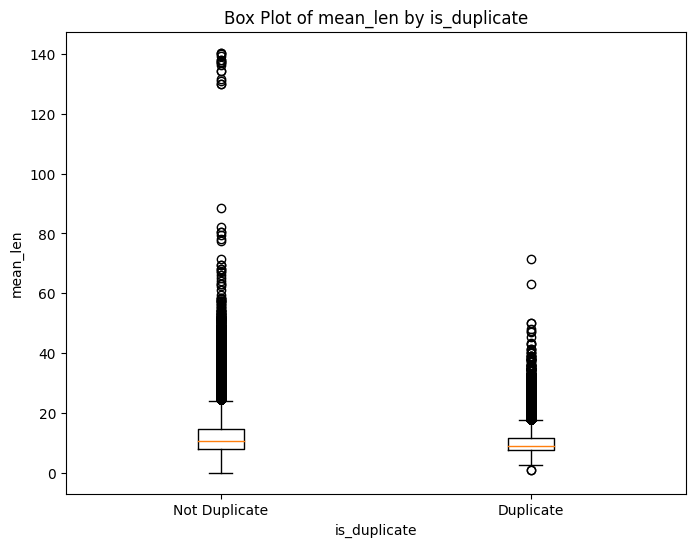

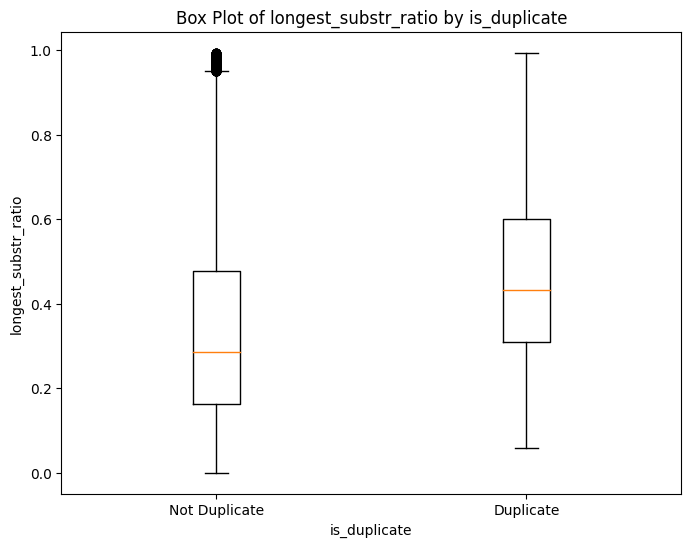

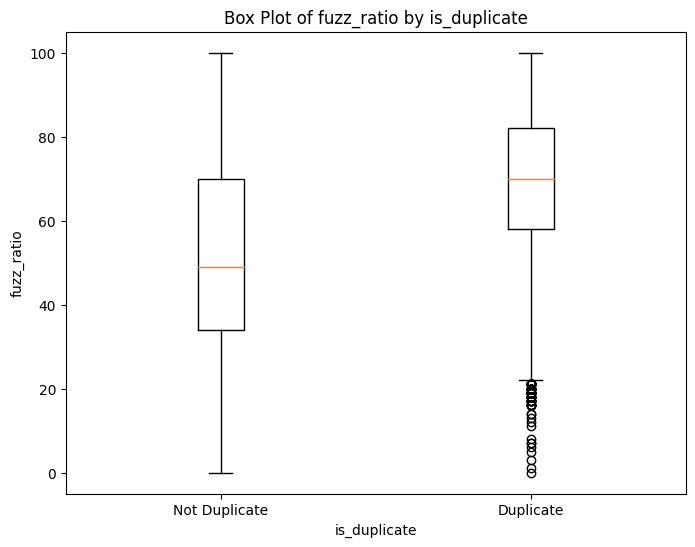

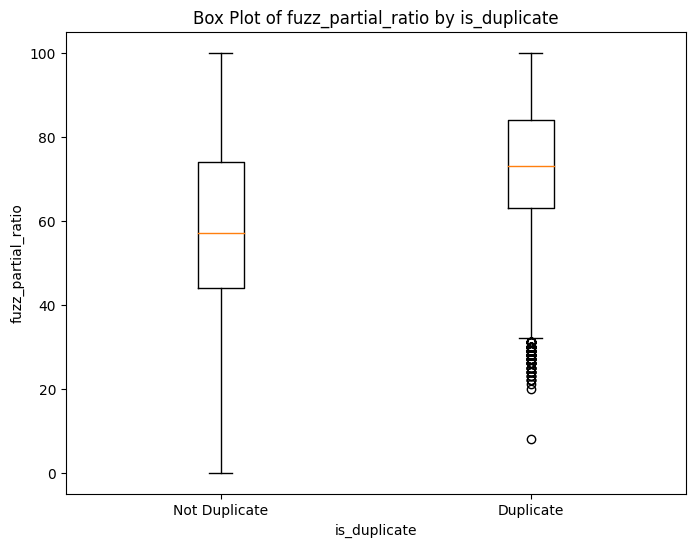

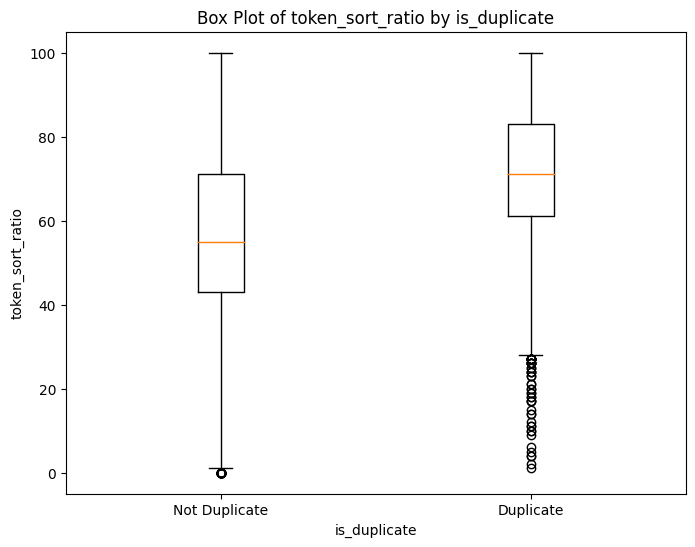

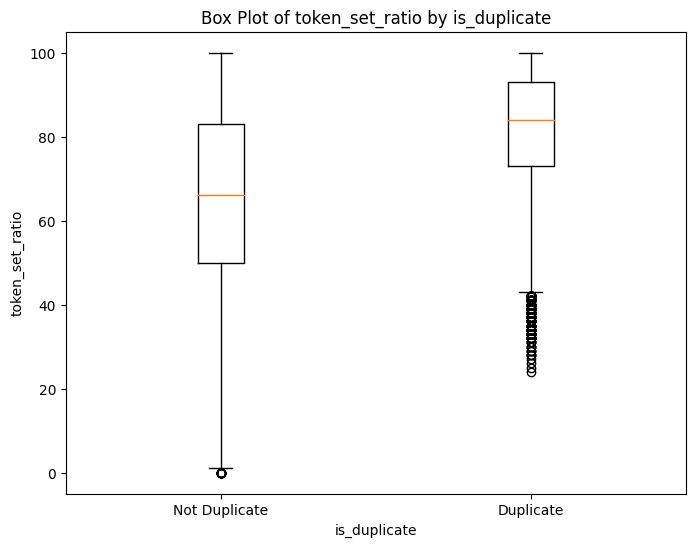

In [ ]:
import matplotlib.pyplot as plt

# Columns for which you want to create box plots
columns_to_plot = ['score','word_share','cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substr_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'token_set_ratio']

# Create a box plot for each column based on the 'is_duplicate' category
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.boxplot([data[data['is_duplicate'] == 0][col], data[data['is_duplicate'] == 1][col]], labels=['Not Duplicate', 'Duplicate'])
    plt.xlabel('is_duplicate')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by is_duplicate')
    plt.show()


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/output_file.csv')

In [ ]:
X=data[['score', 'word_share', 'cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',  'longest_substr_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'token_set_ratio']]
Y=data['is_duplicate']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.values,Y.values,test_size=0.2,random_state=24)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)


0.8275111600242367

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


xgb = XGBClassifier()


param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}


grid_search = GridSearchCV(xgb, param_grid, cv=5)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred2 = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred2)
print(f"Best hyperparameters: {best_params}")
print(f"Test accuracy: {accuracy}")


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Test accuracy: 0.827770839258554


In [ ]:
import pickle


with open('/content/drive/MyDrive/best_model_quora.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [ ]:
learning_rate = 0.1
n_estimators = 400
max_depth = 6


xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)


xgb.fit(X_train, y_train)


y_pred = xgb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


print(f"Test accuracy: {accuracy}")

Test accuracy: 0.8296256909322485


In [ ]:
import pickle
import numpy as np
from sklearn.metrics import roc_auc_score


with open('/content/drive/MyDrive/best_model_quora.pkl', 'rb') as f:
    loaded_model = pickle.load(f)




y_pred_prob = loaded_model.predict_proba(X_test)[:, 1]


auc = roc_auc_score(y_test, y_pred_prob)

print(f"AUC: {auc}")


AUC: 0.909531821892702


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score,accuracy_score,confusion_matrix
y_pred=loaded_model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Precision: 0.7490578378546734
Recall: 0.8037832960128338
F1-score: 0.7754562455665184
Confusion Matrix:
[[42891  8057]
 [ 5871 24050]]


# Preparing functions for User Input

In [ ]:
import re
from bs4 import BeautifulSoup
import distance
from fuzzywuzzy import fuzz
import pickle
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))


def test_fetch_token_features(q1, q2):
    SAFE_DIV = 0.0001


    STOP_WORDS = stopwords.words("english")

    token_features = [0.0] * 7


    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features


    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])


    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])


    common_word_count = len(q1_words.intersection(q2_words))


    common_stop_count = len(q1_stops.intersection(q2_stops))


    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    return token_features

def test_fetch_length_features(q1, q2):
    length_features = [0.0] * 1


    q1_tokens = q1.split()
    q2_tokens = q2.split()



    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[0] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[0] = 0.0

    return length_features

def test_fetch_fuzzy_features(q1, q2):
    fuzzy_features = [0.0] * 4


    fuzzy_features[0] = fuzz.QRatio(q1, q2)


    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)


    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)


    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features




In [ ]:
def predict_duplicate(ques1,ques2):
    query=[]
    emb1=model.encode(ques1)
    emb2=model.encode(ques2)
    score=calculate_cosine_similarity(emb1,emb2)
    ques1 = preprocess(ques1)
    ques2 = preprocess(ques2)
    query.append(score)
    query.append(round(test_common_words(ques1, ques2) / test_total_words(ques1, ques2), 2))
    token_features = test_fetch_token_features(ques1, ques2)
    query.extend(token_features)
    length_features = test_fetch_length_features(ques1, ques2)
    query.extend(length_features)
    fuzzy_features = test_fetch_fuzzy_features(ques1, ques2)
    query.extend(fuzzy_features)
    return np.array(query)


In [ ]:
ques1="What is the capital of India ?"
ques2="What is the buisness capital of India ?"
arr=predict_duplicate(ques1,ques2)
print(arr)

[  0.82666904   0.46         0.99995      0.66664445   0.999975
   0.999975     0.99998333   0.85713061   1.           0.5862069
  86.          79.          86.         100.        ]


In [ ]:

reshaped_arr = arr.reshape(1, -1)
y = loaded_model.predict(reshaped_arr)[0]

In [ ]:
def label_to_text(y):
    if y == 1 :
        return "Duplicate"
    elif y == 0  :
        return "Not Duplicate"
    else:
        return "Invalid Label"



result_1 = label_to_text(y)

print(f"Question 1: {ques1}")
print(f"Question 2: {ques2}")

print(f"Label {y}: {result_1}")



Question 1: What is the capital of India ?
Question 2: What is the buisness capital of India ?
Label 0: Not Duplicate


In [ ]:
arr=predict_duplicate("which city serves as the capital of India","where is capital of India located")

print(arr)
reshaped_arr = arr.reshape(1, -1)
y_2 = loaded_model.predict(reshaped_arr)[0]
print(y_2)

[ 0.90038323  0.21        0.66664445  0.4999875   0.33332222  0.24999375
  0.49999167  0.37499531  0.          0.5        62.         66.
 54.         68.        ]
1


In [ ]:
print(f"Question 1:which city serves as the capital of India ")
print(f"Question 2: where is capital of India located")
result_2=label_to_text(y_2)
print(f"Label {y_2}: {result_2}")

Question 1:which city serves as the capital of India 
Question 2: where is capital of India located
Label 1: Duplicate


In [ ]:
arr=predict_duplicate("Shreya is my best friend","The name of my best friend is shreya")

print(arr)
reshaped_arr = arr.reshape(1, -1)
y_3 = loaded_model.predict(reshaped_arr)[0]
print(y_3)

[  0.89748979   0.38         0.99996667   0.74998125   0.99995
   0.4999875    0.99998      0.62499219   0.           0.6
  63.          75.          80.         100.        ]
1


In [ ]:
arr=predict_duplicate("What are the health benefits of drinking green tea","Can you tell me about the advantages of consuming green tea")

print(arr)
reshaped_arr = arr.reshape(1, -1)
y_4= loaded_model.predict(reshaped_arr)[0]
print(y_4)

[ 0.87759715  0.2         0.399992    0.399992    0.4999875   0.33332778
  0.44443951  0.36363306  1.          0.25490196 53.         58.
 51.         53.        ]
1


In [ ]:
arr=predict_duplicate("How do I learn programming languages quickly","What's the best way to become proficient in programming languages")

print(arr)
reshaped_arr = arr.reshape(1, -1)
y_4= loaded_model.predict(reshaped_arr)[0]
print(y_4)

[ 0.78668201  0.11        0.4999875   0.33332778  0.          0.
  0.2857102   0.18181653  0.          0.51111111 55.         68.
 56.         65.        ]
1


In [ ]:
arr=predict_duplicate("What are the benefits of meditation","How can I improve my focus and concentration")

print(arr)

reshaped_arr = arr.reshape(1, -1)
y_4= loaded_model.predict(reshaped_arr)[0]
print(y_4)

[ 0.40693042  0.          0.          0.          0.          0.
  0.          0.          0.          0.13888889 33.         39.
 41.         41.        ]
0


In [ ]:
arr=predict_duplicate("What is the capital of France","How do I say 'hello' in French")
print(arr)
reshaped_arr = arr.reshape(1, -1)
y_4= loaded_model.predict(reshaped_arr)[0]
print(y_4)

[ 0.41906771  0.          0.          0.          0.          0.
  0.          0.          0.          0.10344828 49.         46.
 35.         35.        ]
0


In [ ]:
import pkg_resources
import os

def get_package_version(package_name):
    try:
        return pkg_resources.get_distribution(package_name).version
    except pkg_resources.DistributionNotFound:
        return None

required_packages = [
    f"pandas=={get_package_version('pandas')}",
    f"sentence-transformers=={get_package_version('sentence-transformers')}",
    f"nltk=={get_package_version('nltk')}",
    f"numpy=={get_package_version('numpy')}",
    f"distance=={get_package_version('distance')}",
    f"fuzzywuzzy=={get_package_version('fuzzywuzzy')}",
    f"seaborn=={get_package_version('seaborn')}",
]

drive_folder = '/content/drive/MyDrive/Datasets/'


os.makedirs(drive_folder, exist_ok=True)


os.chdir(drive_folder)

with open('requirements_nlp.txt', 'w') as file:
    for package in required_packages:
        file.write(package + '\n')
